### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of Google for the year 2017

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper Functions for Plotting Predictions and Calculating RMSE

In [2]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real Google Stock Price')
    plt.plot(predicted, color='blue', label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [ ]:
/content/GOOGL_2006-01-01_to_2018-01-01.csv

Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [3]:
df = pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv')

Visualizing the data

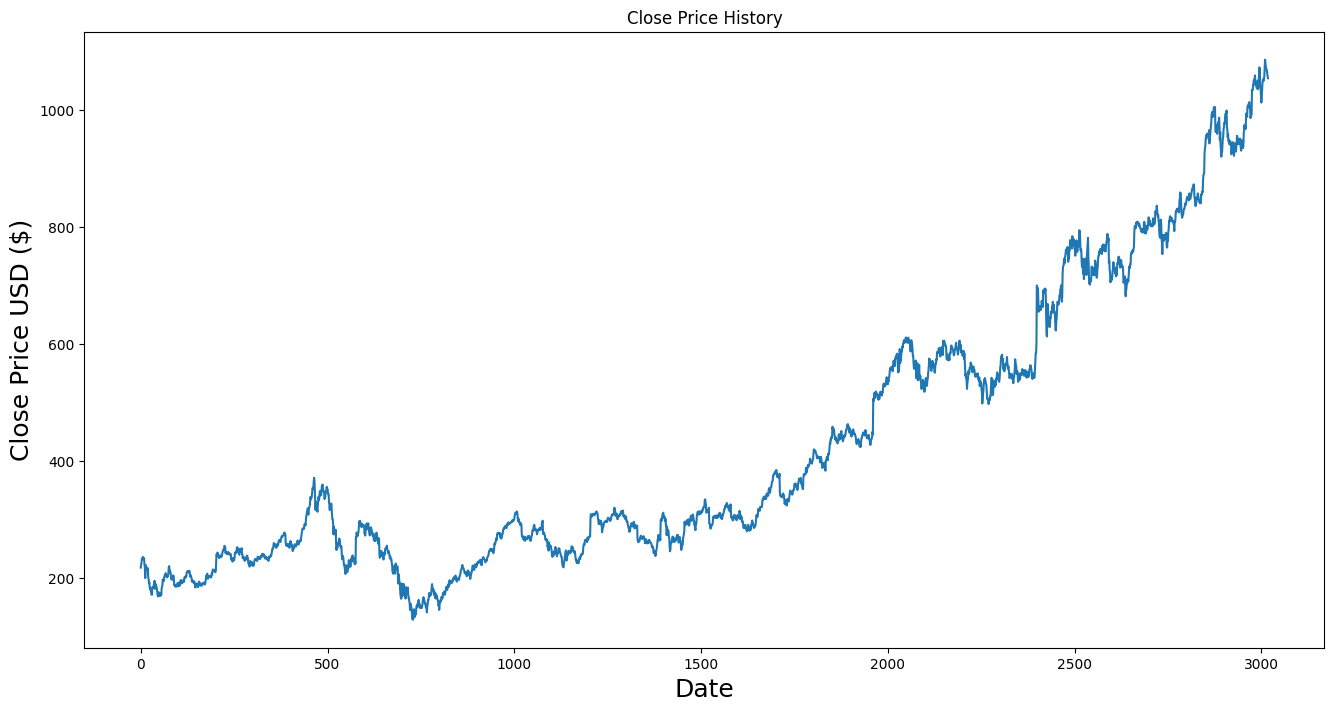

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Data Preprocessing

Scaling the training set

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')


training_set = df[:'2016'].iloc[:, 1:2].values
test_set = df['2017':].iloc[:, 1:2].values

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [12]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
85/85 [==============================] - 17s 106ms/step - loss: 0.0146
Epoch 2/100
85/85 [==============================] - 10s 113ms/step - loss: 0.0033
Epoch 3/100
85/85 [==============================] - 10s 119ms/step - loss: 0.0028
Epoch 4/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0024
Epoch 5/100
85/85 [==============================] - 9s 101ms/step - loss: 0.0025
Epoch 6/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0023
Epoch 7/100
85/85 [==============================] - 10s 113ms/step - loss: 0.0025
Epoch 8/100
85/85 [==============================] - 9s 105ms/step - loss: 0.0020
Epoch 9/100
85/85 [==============================] - 9s 110ms/step - loss: 0.0019
Epoch 10/100
85/85 [==============================] - 10s 117ms/step - loss: 0.0019
Epoch 11/100
85/85 [==============================] - 10s 117ms/step - loss: 0.0020
Epoch 12/100
85/85 [==============================] - 10s 112ms/step - loss: 0.0020
Epoc


## Make preductuion with LSTM model

In [15]:
dataset_total = pd.concat((df["Open"][:'2016'], df["Open"]['2017':]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [16]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 45ms/step


Visualizing the results

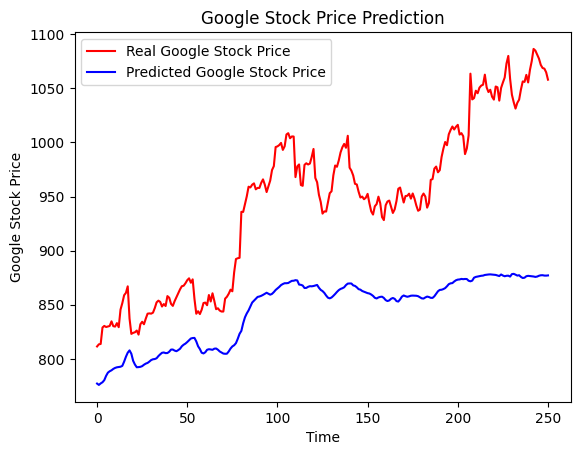

In [17]:
plot_predictions(test_set, predicted_stock_price)

Evaluating LSMT Model

In [18]:
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 110.85130961064975.


## GRU Model

In [19]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer='adam', loss='mean_squared_error')

regressorGRU.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 18s 112ms/step - loss: 0.0148
Epoch 2/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0028
Epoch 3/50
85/85 [==============================] - 10s 123ms/step - loss: 0.0024
Epoch 4/50
85/85 [==============================] - 9s 110ms/step - loss: 0.0023
Epoch 5/50
85/85 [==============================] - 10s 111ms/step - loss: 0.0021
Epoch 6/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0020
Epoch 7/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0018
Epoch 8/50
85/85 [==============================] - 9s 108ms/step - loss: 0.0018
Epoch 9/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0018
Epoch 10/50
85/85 [==============================] - 10s 122ms/step - loss: 0.0016
Epoch 11/50
85/85 [==============================] - 10s 124ms/step - loss: 0.0017
Epoch 12/50
85/85 [==============================] - 9s 108ms/step - loss: 0.0017
Epoch 13/50
85/8


## Make preductuion with GRU model

In [20]:
predicted_stock_price_gru = regressorGRU.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

8/8 [==============================] - 2s 26ms/step


Visualizing the Results

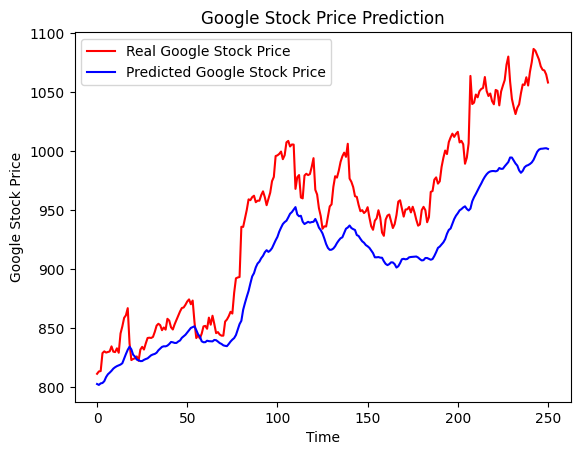

In [21]:
plot_predictions(test_set, predicted_stock_price_gru)

Evaluating GRU Model

In [22]:
return_rmse(test_set, predicted_stock_price_gru)

The root mean squared error is 47.94872064787937.
